## Exploratory Data Analysis and Regression Testing

In [1]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatch


warnings.filterwarnings("ignore")
plt.rcParams["font.family"] = "Times New Roman"
csfont = {"fontname": "Times New Roman"}

import scipy
from scipy.stats import pearsonr, spearmanr

In [2]:
# read existing data

df = pd.read_csv("vader_sentiment_tweets.csv")

In [3]:
# computing mean sentiment of a congressman in each policy category

df_grouped = (
    df.groupby(
        [
            "username",
            "policy",
            "State",
            "Party",
            "Gender",
            "Race_Ethnicity",
            "Religion",
            "LGBTQ",
            "govtrack_id",
            "ideology",
            "age",
            "govtrack_cluster",
            "govtrack_class",
        ]
    )["compound_sentiment"]
    .mean()
    .reset_index()
)

In [4]:
df_grouped.rename(columns={"Race_Ethnicity": "Ethnicity"}, inplace=True)

In [5]:
christian_categories = {
    "Christian": "Christian",
    "Christian - Roman Catholic": "Christian",
    "Christian - Baptist": "Christian",
    "Christian - Mormon": "Christian",
    "Hindu": "Hindu",
    "Jewish": "Jewish",
    "Christian - Catholic": "Christian",
    "Christian - Evangelical Protestant": "Christian",
    "Christian - Church of God": "Christian",
    "Unknown/Refused": "Unknown",
    "Unaffiliated": "Unaffiliated",
    "Christian - Presbyterian": "Christian",
    "Christian - Methodist": "Christian",
    "Christian - Lutheran": "Christian",
    "Christian - Episcopalian": "Christian",
    "Christian - Southern Baptist": "Christian",
    "Christian - Protestant": "Christian",
    "Christian - Restorationist": "Christian",
    "Christian - Disciples of Christ": "Christian",
    "Christian - Nondenominational": "Christian",
    "Unitarian Universalist": "Christian",
    "Christian - Eastern Orthodox": "Orthodox",
    "Christian - Evangelical Free Church": "Christian",
    "Christian - Pentecostal": "Christian",
    "Christian - Seventh-Day Adventist": "Christian",
    "Christian - Nondenominational Protestant": "Christian",
    "Buddhist - Soka Gakkai": "Buddhist",
    "Muslim": "Muslim",
    "Christian - African Methodist Episcopal": "Christian",
    "Christian - Chaldean Catholic": "Christian",
    "Christian - Congregationalist": "Christian",
    "Christian - United Brethren": "Christian",
    "Christian - Reformed (Calvinist)": "Christian",
}

In [6]:
ethnicity = {
    "Hispanic - Mexican": "Hispanic",
    "White - Non-Hispanic": "White",
    "Asian - Thai": "Asian",
    "Asian - Indian": "Asian",
    "Black - African-American": "Black",
    "Black - African-American/Asian - Filipino": "Black",
    "Hispanic": "Hispanic",
    "Hispanic - Puerto Rican": "Hispanic",
    "White - Portuguese-American": "White",
    "Native American - Chickasaw": "Native American",
    "Black - Jamaican": "Black",
    "Hispanic - Mexican / Jewish": "Hispanic",
    "Hispanic - Cuban": "Hispanic",
    "Asian - Korean": "Asian",
    "Hispanic - Dominican": "Hispanic",
    "Black - Eritrean": "Black",
    "Black - African-American/Trinidadian": "Black",
    "Hispanic - Mexican/Colombian": "Hispanic",
    "Asian - Chinese": "Asian",
    "Asian - Japanese": "Asian",
    "Hispanic - Guatemalan": "Hispanic",
    "Asian - Taiwanese": "Asian",
    "Native American - Ho-Chunk": "Native American",
    "White - Middle Eastern - Lebanese": "White",
    "White - Middle Eastern - Palestinian": "White",
}

In [7]:
#  collapse religion and ethnicity

df_grouped["Religion"] = df_grouped.Religion.apply(lambda x: christian_categories[x])
df_grouped["Ethnicity"] = df_grouped.Ethnicity.apply(lambda x: ethnicity[x])

df_grouped["Christian"] = df_grouped.Religion.apply(
    lambda religion: "Yes" if religion == "Christian" else "No"
)
df_grouped["LGBTQ"] = df_grouped.LGBTQ.apply(
    lambda lgbtq: "No" if lgbtq == "No" else "Yes"
)

df_grouped["Party"] = df_grouped.Party.apply(
    lambda x: "Democratic" if x == "Independent - Dem Caucus" else x
)

In [8]:
# custom legend

def custom_legend(ax, bbox: tuple = (0, 0)):
    #     legends
    title = mlines.Line2D([], [], label="Party", color="white", linewidth=7)
    red_patch = mlines.Line2D([], [], color="red", label="R", linewidth=7, alpha=0.5)
    blue_path = mlines.Line2D([], [], color="blue", label="D", linewidth=7, alpha=0.5)

    leg = ax.legend(
        handles=[title, blue_path, red_patch],
        bbox_to_anchor=bbox,
        borderaxespad=0,
        ncol=3,
        frameon=False,
    )

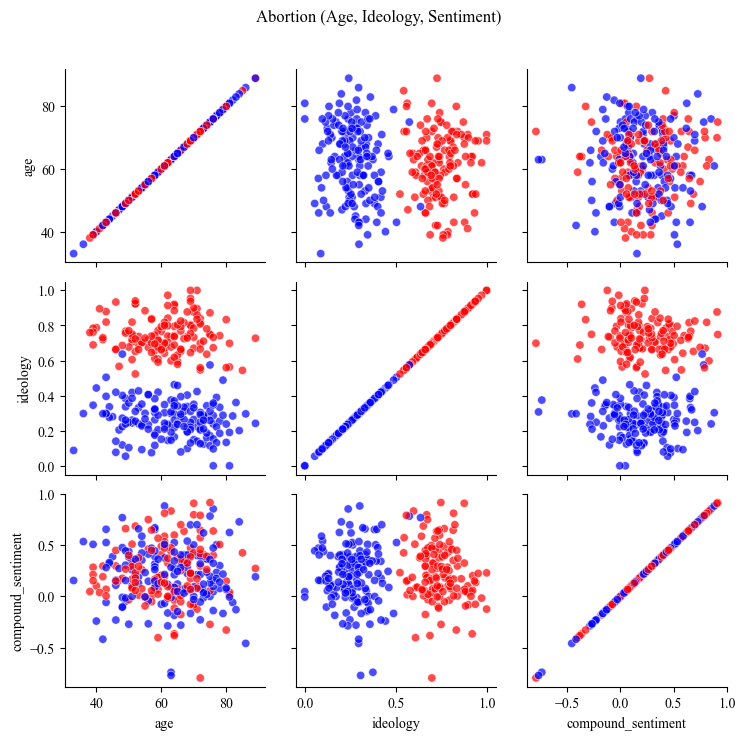

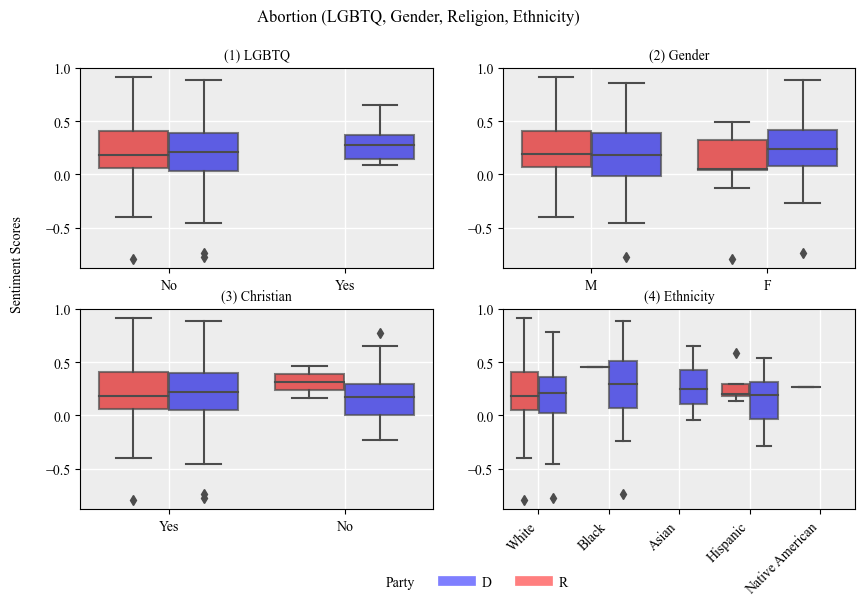

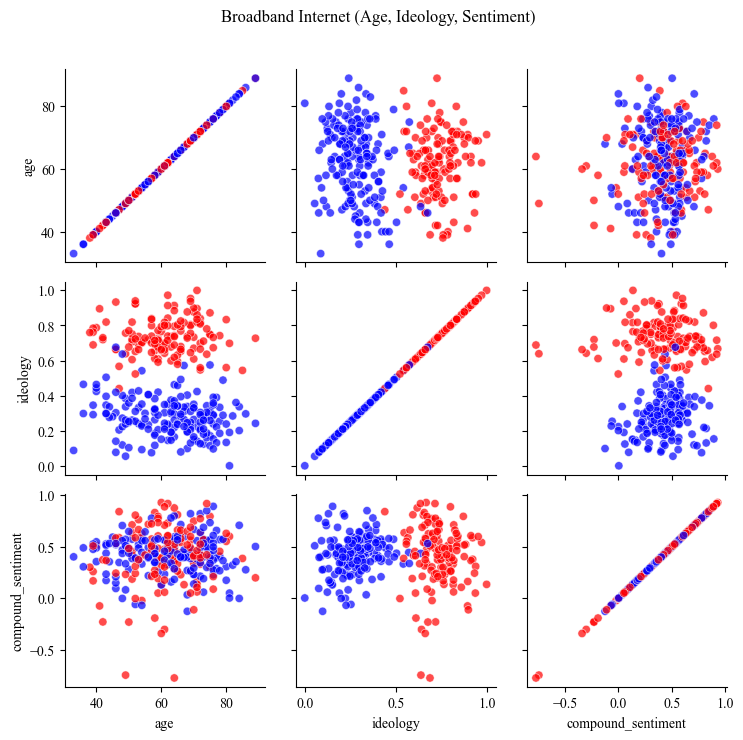

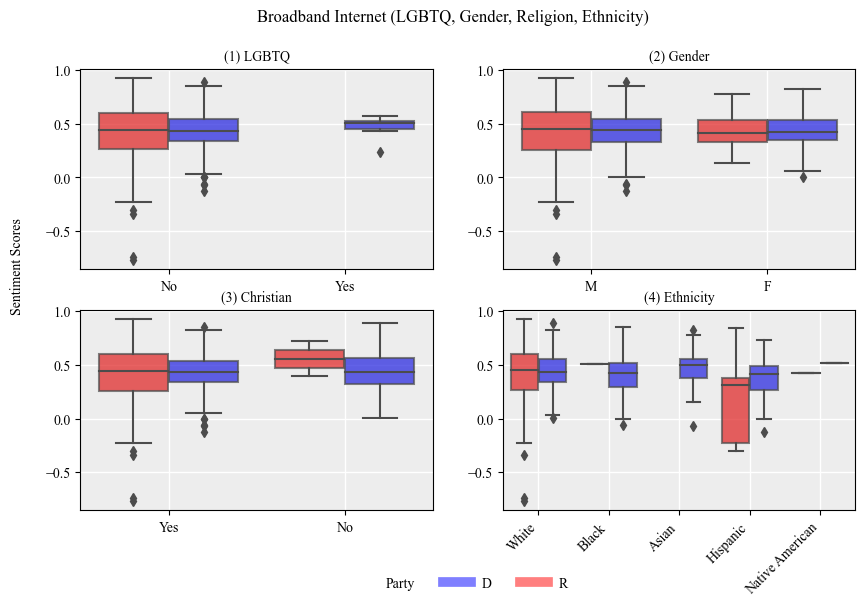

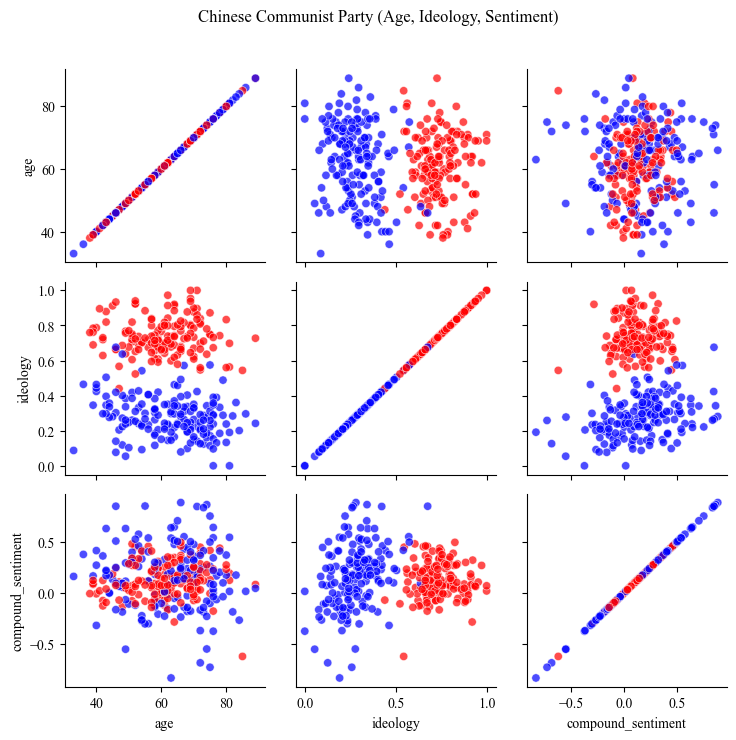

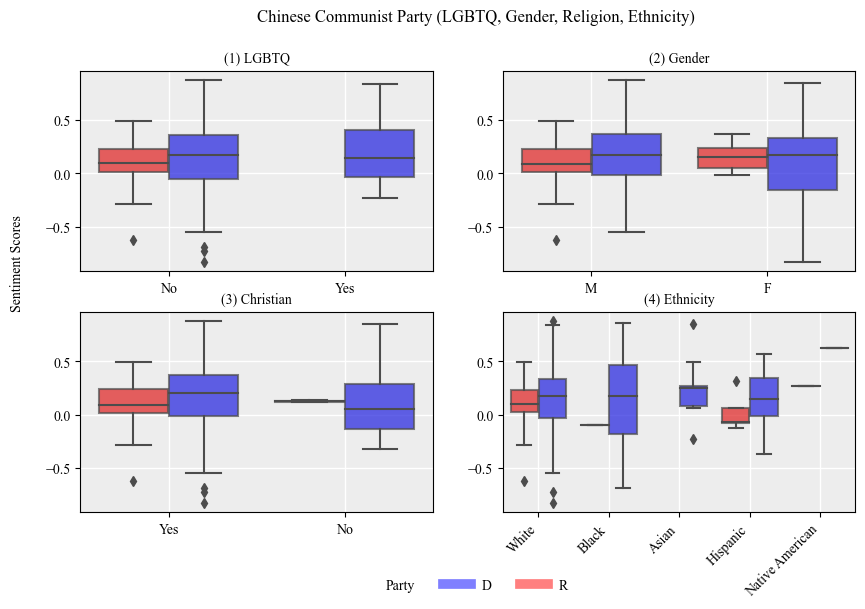

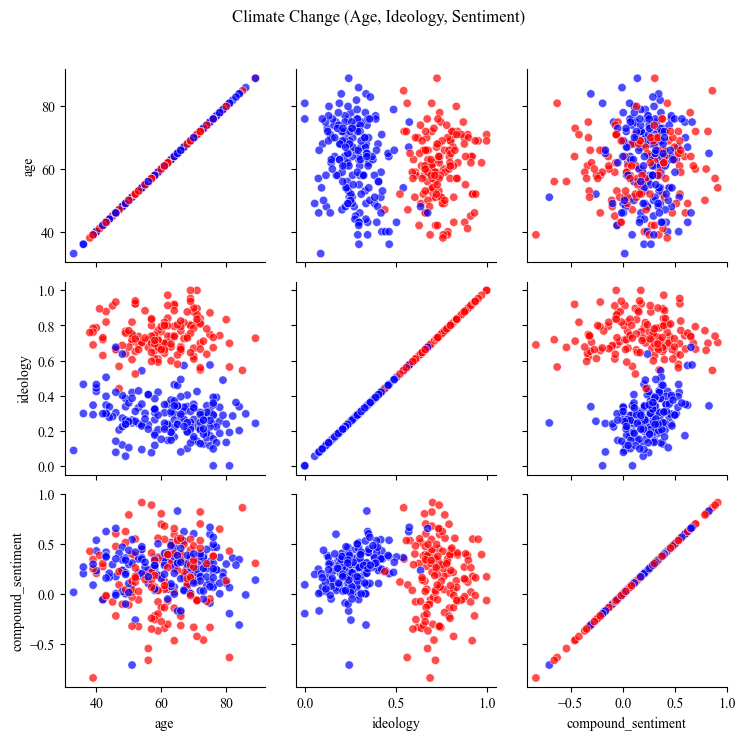

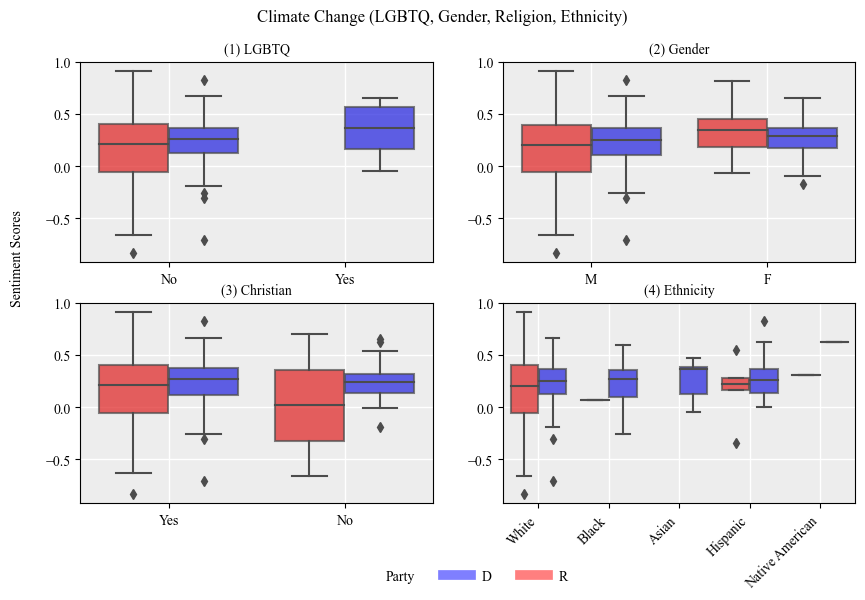

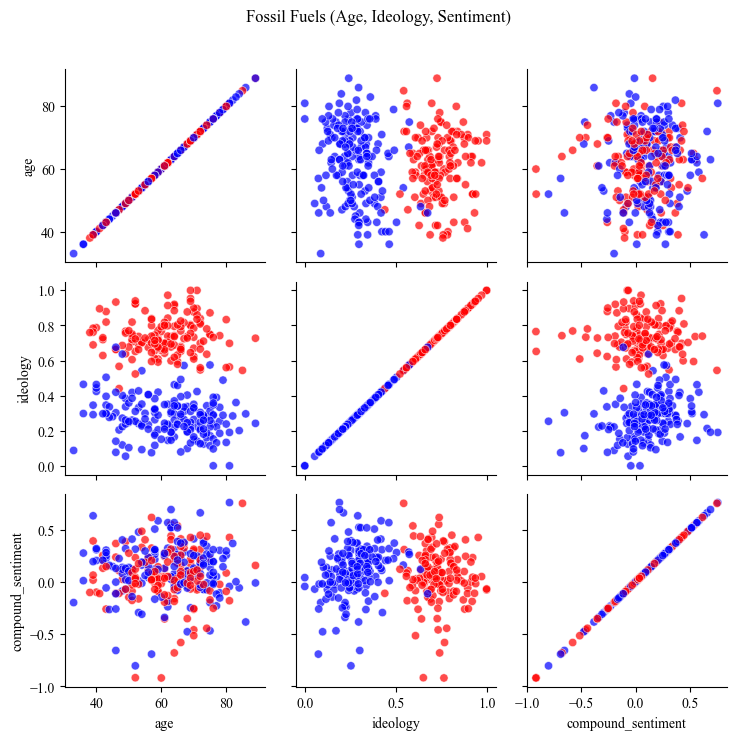

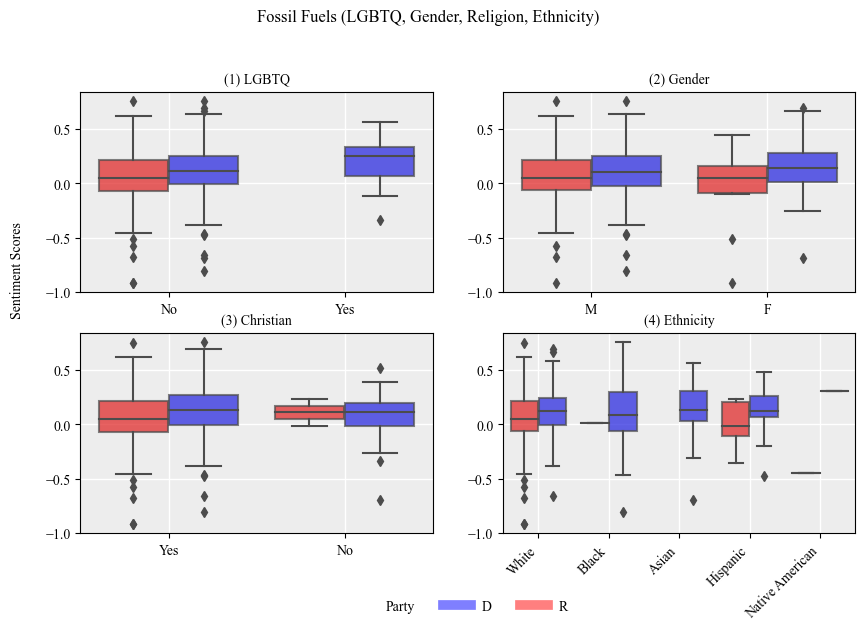

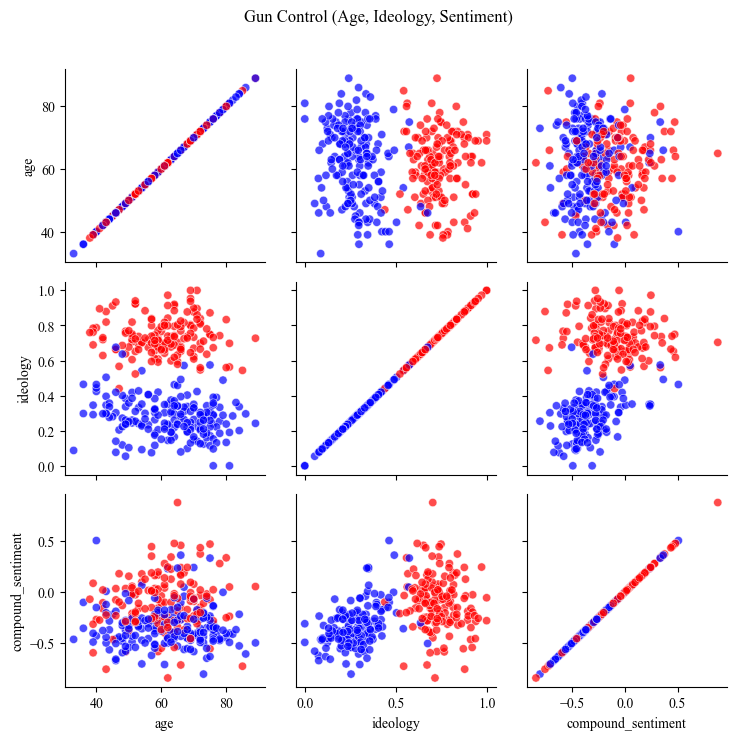

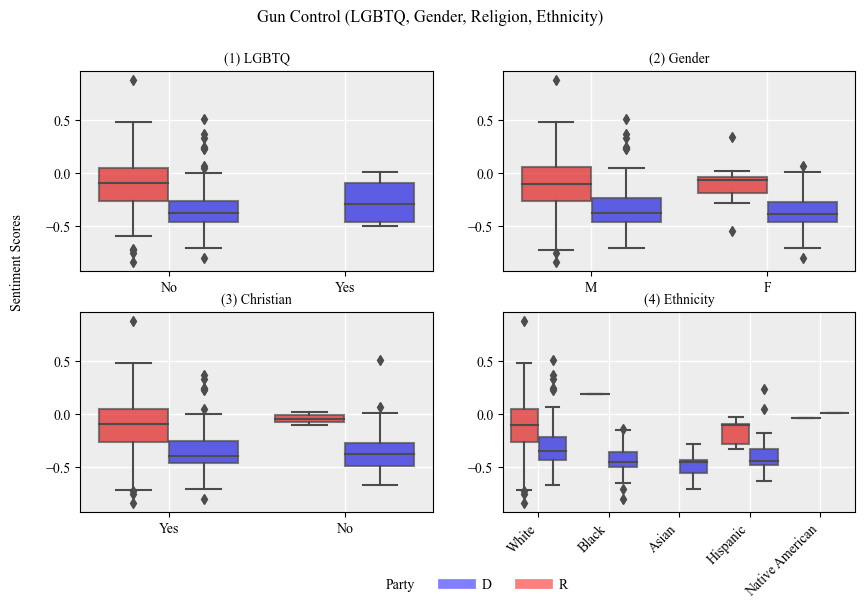

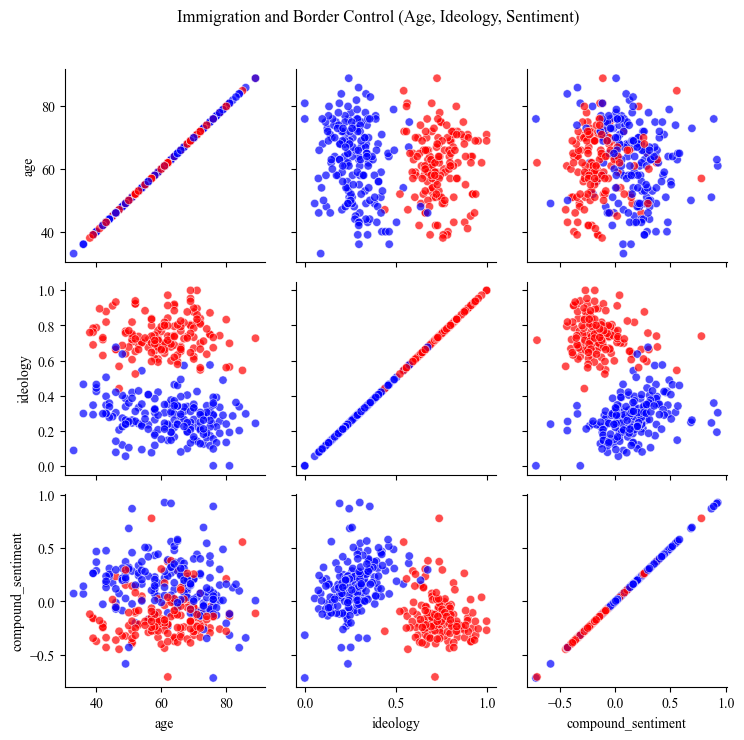

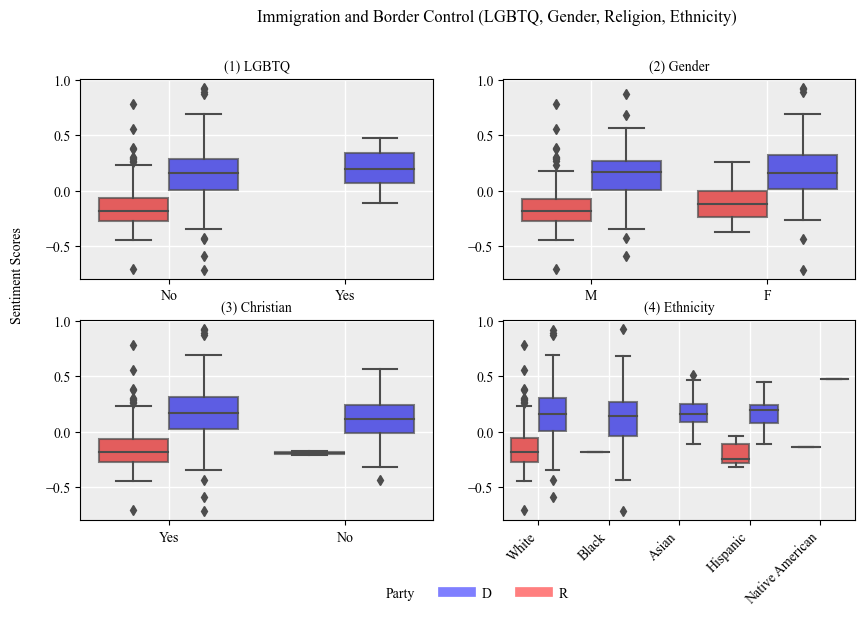

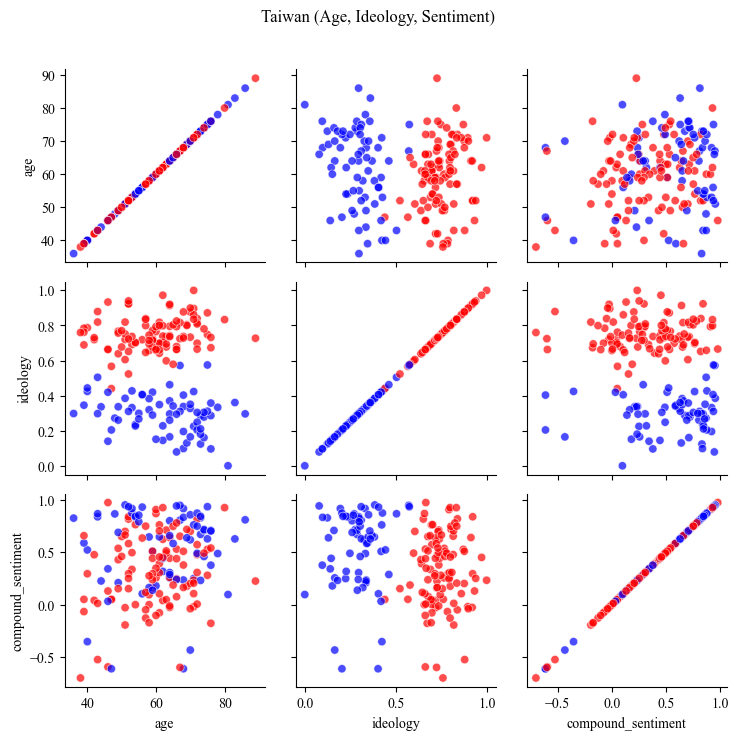

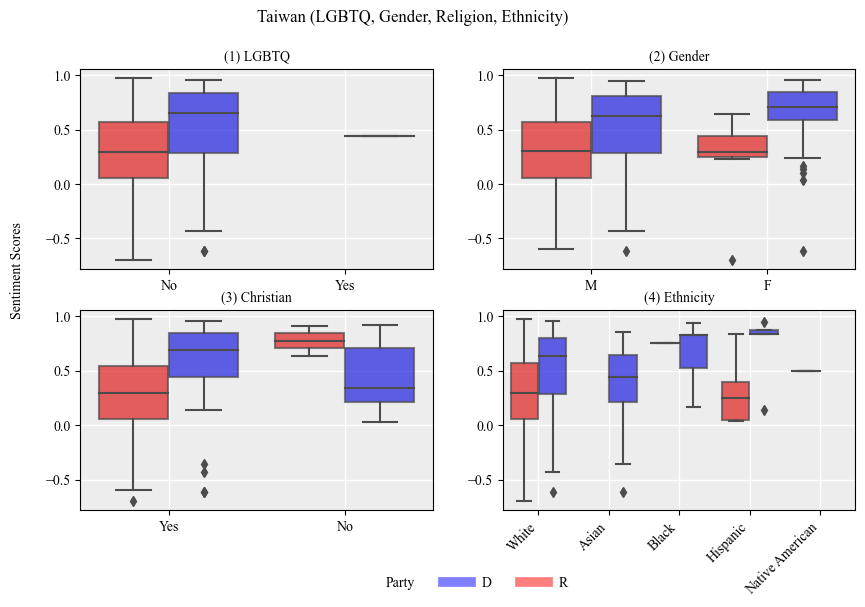

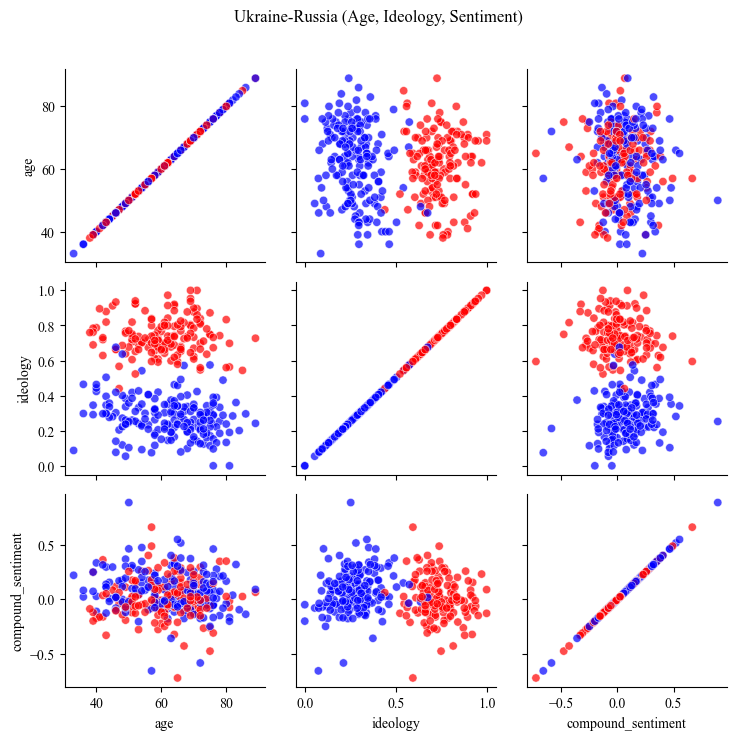

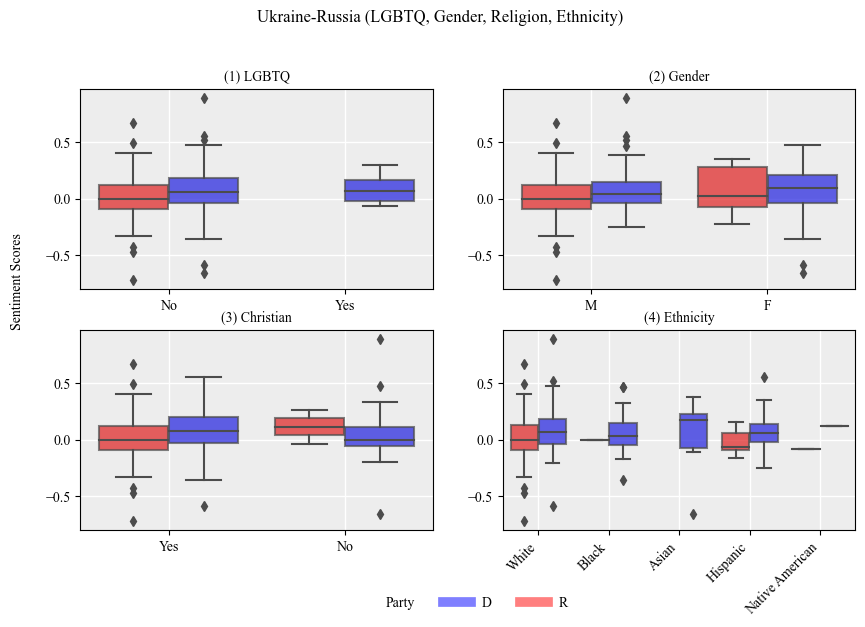

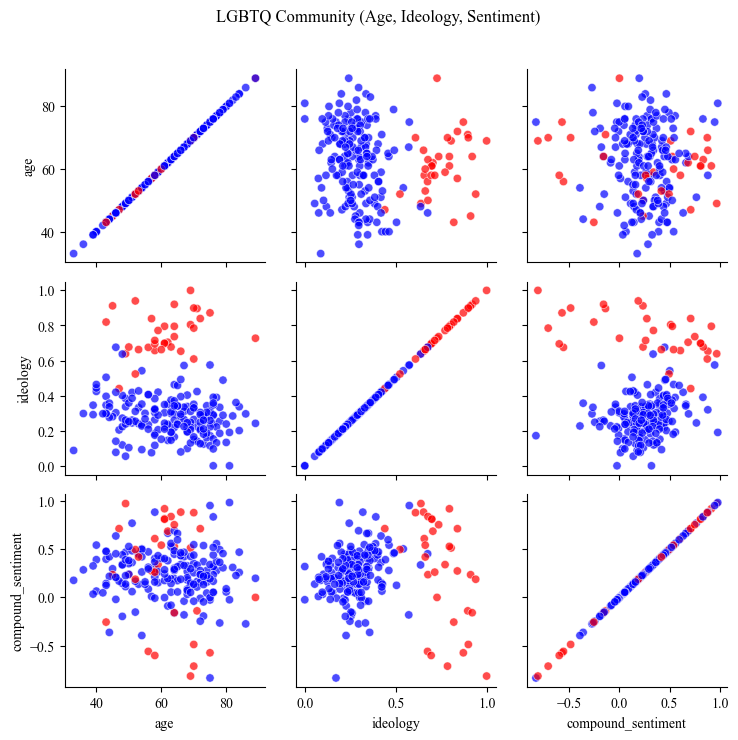

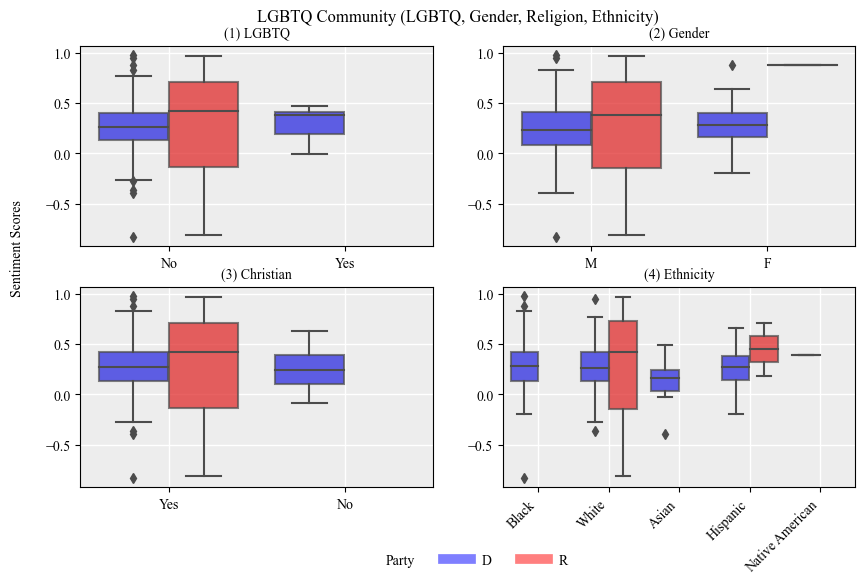

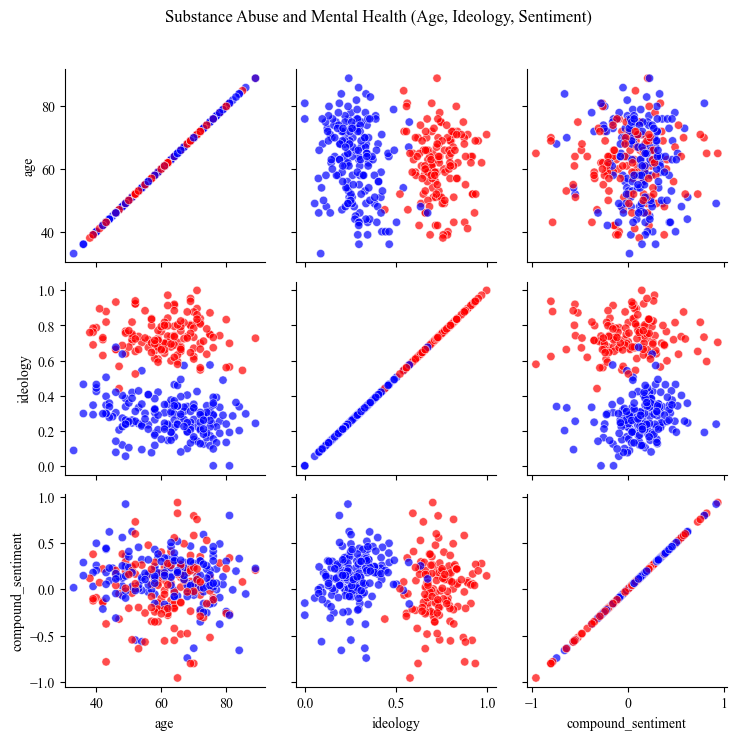

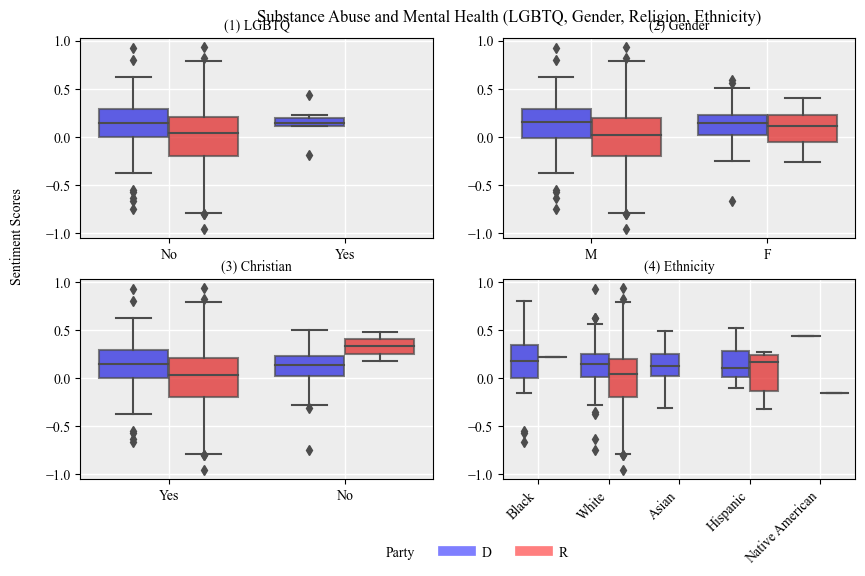

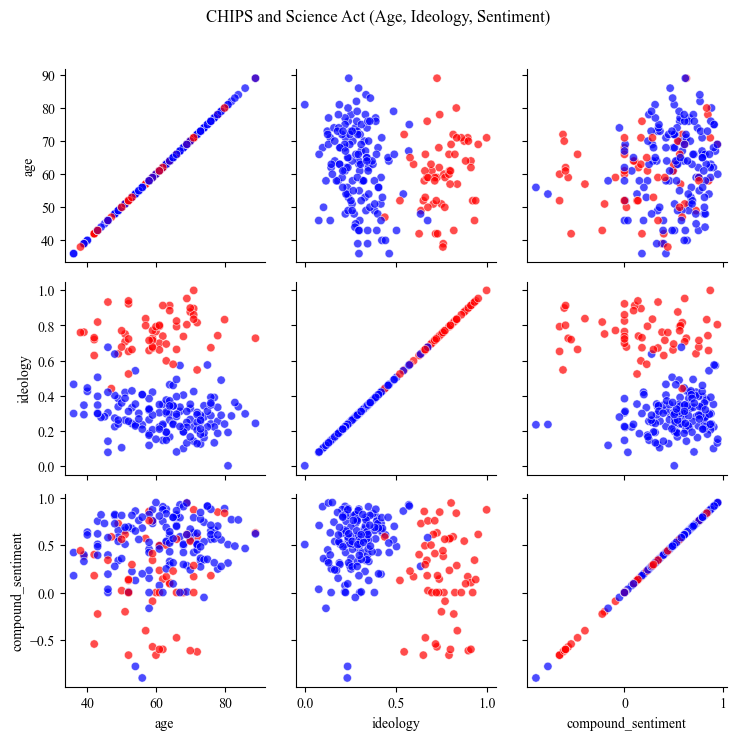

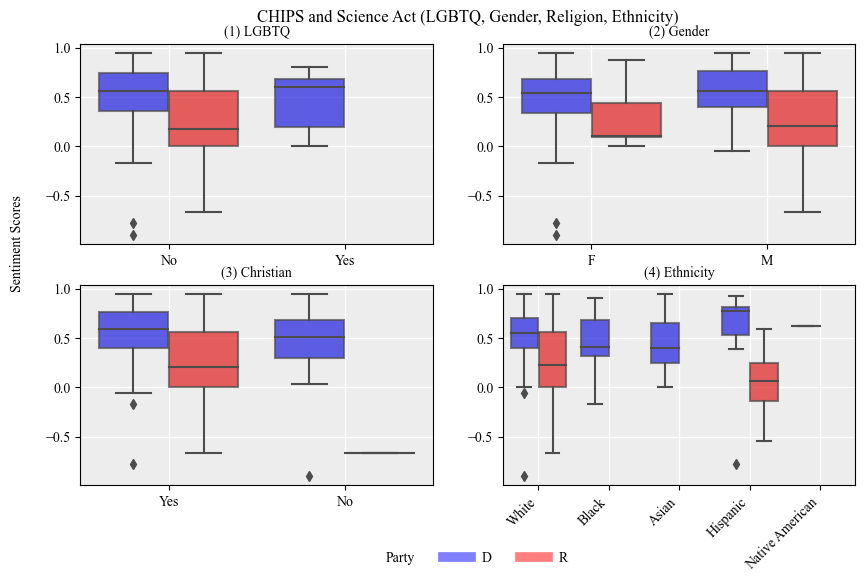

In [9]:
# visualizing relationships of the variables as boxplots (for categorical) and scatterplots (continous)

policies = df_grouped.policy.unique()

for policy in policies:
    # filtered policy dataframe
    df_cat = df_grouped[df_grouped.policy == policy]

    graph = sns.PairGrid(
        df_cat[
            [
                "Party",
                "LGBTQ",
                "Gender",
                "Christian",
                "Ethnicity",
                "age",
                "ideology",
                "compound_sentiment",
            ]
        ],
        hue="Party",
        palette={"Democratic": "b", "Republican": "r"},
    )

    graph = graph.map(sns.scatterplot, alpha=0.7)
    graph.fig.subplots_adjust(top=0.9)
    graph.fig.suptitle(f"{policy} (Age, Ideology, Sentiment)")

    plt.show()

    # pairing the categorical variables
    fig1 = plt.figure(1, figsize=(10, 12), dpi=100)
    n = 0

    for x_var in ["LGBTQ", "Gender", "Christian", "Ethnicity"]:
        n += 1

        ax = fig1.add_subplot(4, 2, n)
        plt.subplots_adjust(hspace=0.2, wspace=0.2)
        sns.boxplot(
            data=df_cat,
            x=x_var,
            y="compound_sentiment",
            hue="Party",
            dodge=True,
            palette={"Democratic": "b", "Republican": "r"},
            boxprops=dict(alpha=0.7),
        )

        if x_var == "Ethnicity":
            plt.xticks(rotation=45, ha="right")

        plt.ylabel("")
        plt.xlabel("")
        plt.title("{}".format(f"({n}) {x_var}"), fontsize=10, **csfont)
        ax.get_legend().remove()

        ax.set_facecolor("#D3D3D3")
        ax.patch.set_alpha(0.4)

        # grid lines based on major tick (x)
        ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="x")

        ax.xaxis.grid(True)  # Show the vertical gridlines

        # grid lines based on minor tick (y)
        ax.grid(which="major", color="w", linestyle="-", linewidth=1, axis="y")

        # Remove minor ticks
        ax.tick_params(which="minor", bottom=False, left=False)

        # set axis below
        ax.set_axisbelow(True)

    # custom legend
    custom_legend(ax, bbox=(0.2, -0.3))
    ax.text(
        -4,
        3.7,
        f"{policy} (LGBTQ, Gender, Religion, Ethnicity)",
        fontsize=12,
    )
    ax.text(-7.5, 1, "Sentiment Scores", rotation=90, fontsize=10)
    plt.show()

### Spearman Rank and Pearson correlation testing
<p>1. Dummify categorical variables - LGBTQ, Gender, Ethnicity and Religion
</p>

In [10]:
# create dummies

X_cat = df_grouped[["Party", "LGBTQ", "Gender", "Christian", "Ethnicity"]]
X_cont = df_grouped[["age", "ideology"]]
policy = df_grouped[["policy", "Party"]]

# dummify x cat
X_dummy = pd.get_dummies(data=X_cat, drop_first=True)
X = pd.concat([X_dummy, X_cont], axis=1)
Y = df_grouped["compound_sentiment"]
dummy_df = pd.concat([X, policy, Y], axis=1)

In [11]:
dummy_df.head(5)

,Party_Republican,LGBTQ_Yes,Gender_M,Christian_Yes,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_Native American,Ethnicity_White,age,ideology,policy,Party,compound_sentiment
0,1,0,1,1,0,0,0,1,53.0,0.690984,Abortion,Republican,0.012751
1,1,0,1,1,0,0,0,1,53.0,0.690984,Broadband Internet,Republican,0.764134
2,1,0,1,1,0,0,0,1,53.0,0.690984,Chinese Communist Party,Republican,-0.019629
3,1,0,1,1,0,0,0,1,53.0,0.690984,Climate Change,Republican,-0.056832
4,1,0,1,1,0,0,0,1,53.0,0.690984,Fossil Fuels,Republican,-0.162823


In [13]:
# using pearson corrrelation

for x_var in X.columns.unique():
    pearson_coeff, p_value = pearsonr(dummy_df[x_var], Y)

    print(
        f"\nCoefficient of Correlation between sentiment and {x_var}:",
        pearson_coeff * 100,
        "%",
    )


Coefficient of Correlation between sentiment and Party_Republican: -11.627919315839437 %

Coefficient of Correlation between sentiment and LGBTQ_Yes: 3.537706144920428 %

Coefficient of Correlation between sentiment and Gender_M: -5.410261548816867 %

Coefficient of Correlation between sentiment and Christian_Yes: -0.8474363902883801 %

Coefficient of Correlation between sentiment and Ethnicity_Black: 0.5109670950181734 %

Coefficient of Correlation between sentiment and Ethnicity_Hispanic: 1.6272523768974347 %

Coefficient of Correlation between sentiment and Ethnicity_Native American: 2.3314869337647632 %

Coefficient of Correlation between sentiment and Ethnicity_White: -2.3226896917550777 %

Coefficient of Correlation between sentiment and age: 1.1328377330676334 %

Coefficient of Correlation between sentiment and ideology: -6.406643138797382 %


In [16]:
# using Spearman rank (recommended for cat vars)

for x_var in X.columns.unique():
    spearmanr_coeff, p_value = spearmanr(dummy_df[x_var], Y)

    print(
        f"\nCoefficient of Correlation between sentiment and {x_var}:",
        spearmanr_coeff * 100,
        "%",
    )


Coefficient of Correlation between sentiment and Party_Republican: -13.880188947908106 %

Coefficient of Correlation between sentiment and LGBTQ_Yes: 3.8700559765546574 %

Coefficient of Correlation between sentiment and Gender_M: -7.138253518687016 %

Coefficient of Correlation between sentiment and Christian_Yes: -1.1274559640891826 %

Coefficient of Correlation between sentiment and Ethnicity_Black: 1.4998694220586593 %

Coefficient of Correlation between sentiment and Ethnicity_Hispanic: 1.4474337391940522 %

Coefficient of Correlation between sentiment and Ethnicity_Native American: 2.6982990935847684 %

Coefficient of Correlation between sentiment and Ethnicity_White: -3.41271892478279 %

Coefficient of Correlation between sentiment and age: 0.7567891829351415 %

Coefficient of Correlation between sentiment and ideology: -5.696714964875409 %


In [17]:
# visualizing correlation as a heatmap

def heatmap(x, y, dataframe, name=""):
    """
    custom heatmap plot
    """
    
    plt.figure(figsize=(x, y))
    sns.heatmap(dataframe.corr(), cmap="OrRd", annot=True)
    plt.savefig(f"{name}.png")
    plt.show()

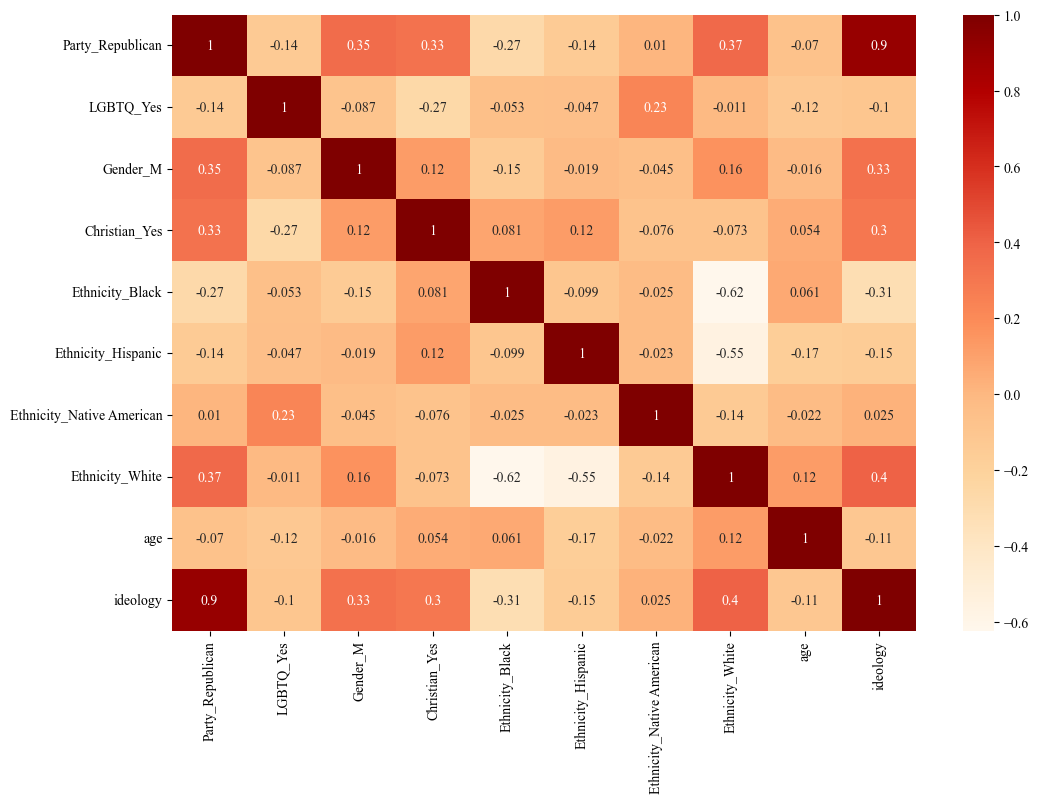

In [18]:
heatmap(12, 8, X, name="independent_var")

### Multiple regression testing

In [28]:
# using dummy data

dummy_mod = sm.OLS(Y, X).fit()
print(dummy_mod.summary())

                                 OLS Regression Results                                
Dep. Variable:     compound_sentiment   R-squared (uncentered):                   0.189
Model:                            OLS   Adj. R-squared (uncentered):              0.187
Method:                 Least Squares   F-statistic:                              81.73
Date:                Wed, 05 Jul 2023   Prob (F-statistic):                   1.69e-151
Time:                        13:05:39   Log-Likelihood:                         -1053.1
No. Observations:                3507   AIC:                                      2126.
Df Residuals:                    3497   BIC:                                      2188.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [29]:
# Using age and religion as continous variables

mod = sm.OLS(Y, X_cont).fit()
print(mod.summ

In [24]:
# regression modelling

def new_model(data):
    "model"
    mod = smf.ols(
        formula="compound_sentiment ~ ideology + Party + LGBTQ + Gender + Religion + Ethnicity + age",
        data=data,
    )

    return mod.fit()

In [26]:
# fit data into the model

res = new_model(df_grouped)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     compound_sentiment   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6.090
Date:                Wed, 05 Jul 2023   Prob (F-statistic):           1.71e-13
Time:                        13:01:18   Log-Likelihood:                -1048.9
No. Observations:                3507   AIC:                             2132.
Df Residuals:                    3490   BIC:                             2236.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       